# Importing Libraries 

In [9]:
from typing import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Read csv file and displaying all column names

In [11]:
covid_Df = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv")
print(covid_Df.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


# Display Dataset

In [12]:
covid_Df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,863.0,904.0,NaN
1,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,3872.0,3992.0,NaN
2,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,10179.0,10522.0,NaN
3,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,25876.0,26746.0,NaN
4,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,56709.0,58452.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310495,10/31/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,NaN
310496,10/31/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,NaN
310497,10/31/2021,08/01/2021,08/28/2021,By Month,2021.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,310.0,310.0,NaN
310498,10/31/2021,09/01/2021,09/30/2021,By Month,2021.0,9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,265.0,265.0,NaN


# Data cleaning and transformation

# Renaming dataframe columns

In [13]:
covid_Df.rename(columns={'Data As Of': 'data_as_of', 'Start Date': 'start_date','End Date' : 'end_date',
                        'Group' :'aggregate_group' , 'Year' : 'year', 'Month' : 'month', 'State' : 'state',
                         'Condition Group' : 'illness_condition_group', 'Condition' : 'illness_condition',
                     'ICD10_codes' : 'ICD-10_codes', 'Age Group' : 'age_group','COVID-19 Deaths' : 'death_count',
                        'Number of Mentions' :'number_of_mentions', 'Flag' :'flag'
                       }, inplace=True)

# Dropping blank Death Count which has been suppressed in accordance with NCHS confidentiality standards.

In [14]:
covidDf = covid_Df[(covid_Df.flag != 'One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.')]

# Dropping Irrelevant columns

In [15]:
covidDf = covidDf.drop('data_as_of',1)

In [16]:
covidDf = covidDf.drop('flag',1)

# Replacing NaN value for column Year and Month with NA

In [17]:
covidDf['year'] = covidDf['year'].fillna('NA')

In [18]:
covidDf['month'] = covidDf['month'].fillna('NA')

# EDA

# Covid19 Death toll in USA by Age group till Oct'21 by NCHS

In [19]:
DF2 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.illness_condition =='COVID-19') & (covidDf.age_group != 'All Ages') ]  

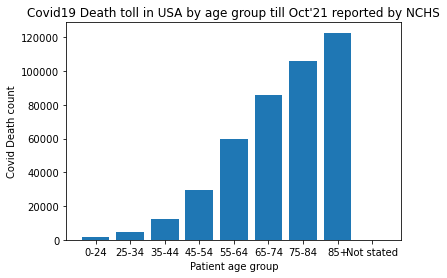

In [20]:
plt.bar(DF2['age_group'],DF2['death_count'])
plt.ylabel("Covid Death count")
plt.xlabel("Patient age group")
plt.title("Covid19 Death toll in USA by age group till Oct'21 reported by NCHS",loc='center')
plt.show()


# Various illness conditions contributed to covid death in USA

In [21]:
DF1 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.age_group =='All Ages') & (covidDf.year ==2021) & (covidDf.illness_condition !='COVID-19')]  

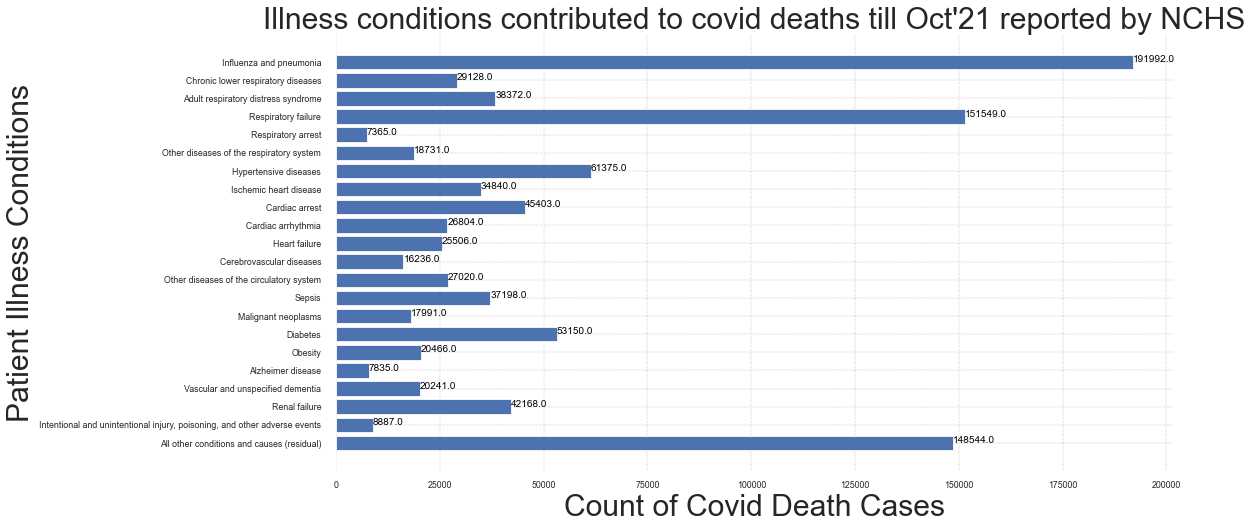

In [107]:
fig, ax = plt.subplots(figsize =(15, 8))
ax.barh(DF1['illness_condition'],DF1['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("Patient Illness Conditions")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Illness conditions contributed to covid deaths till Oct'21 reported by NCHS",
             loc='center' , fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
plt.show()


# Covid death count in US states in year 2020 as reported by NCHS

In [23]:
DF3 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group =='All Ages')  & (covidDf.illness_condition =='COVID-19')  & (covidDf.year ==2020) ] 


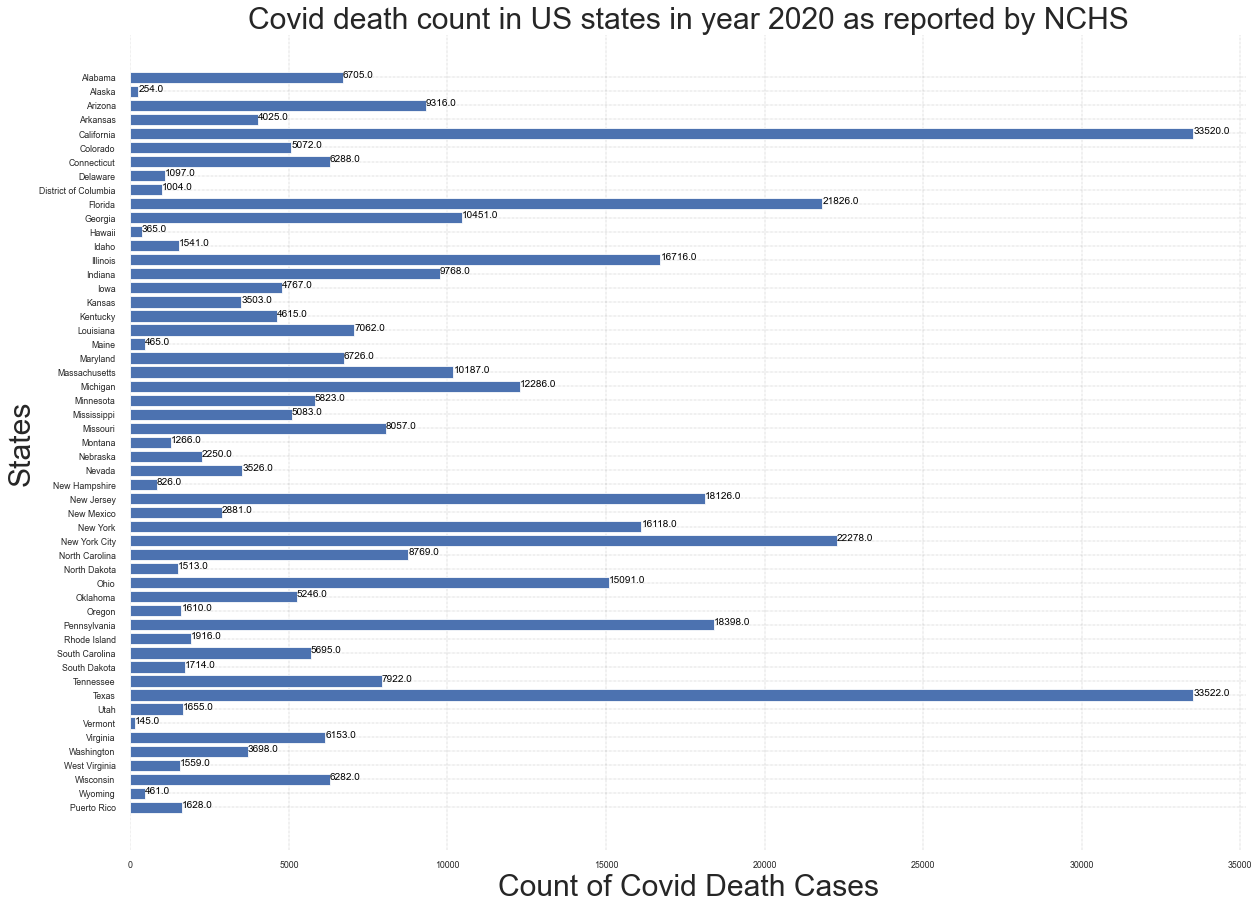

In [108]:
fig, ax = plt.subplots(figsize =(20, 15))
ax.barh(DF3['state'],DF3['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("States")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Covid death count in US states in year 2020 as reported by NCHS",
             loc='center' , fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
plt.show()


# Covid death count in US states in year 2021 till Oct'21 as reported by NCHS

In [25]:
DF4 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group =='All Ages')  & (covidDf.illness_condition =='COVID-19')  & (covidDf.year ==2021) ] 


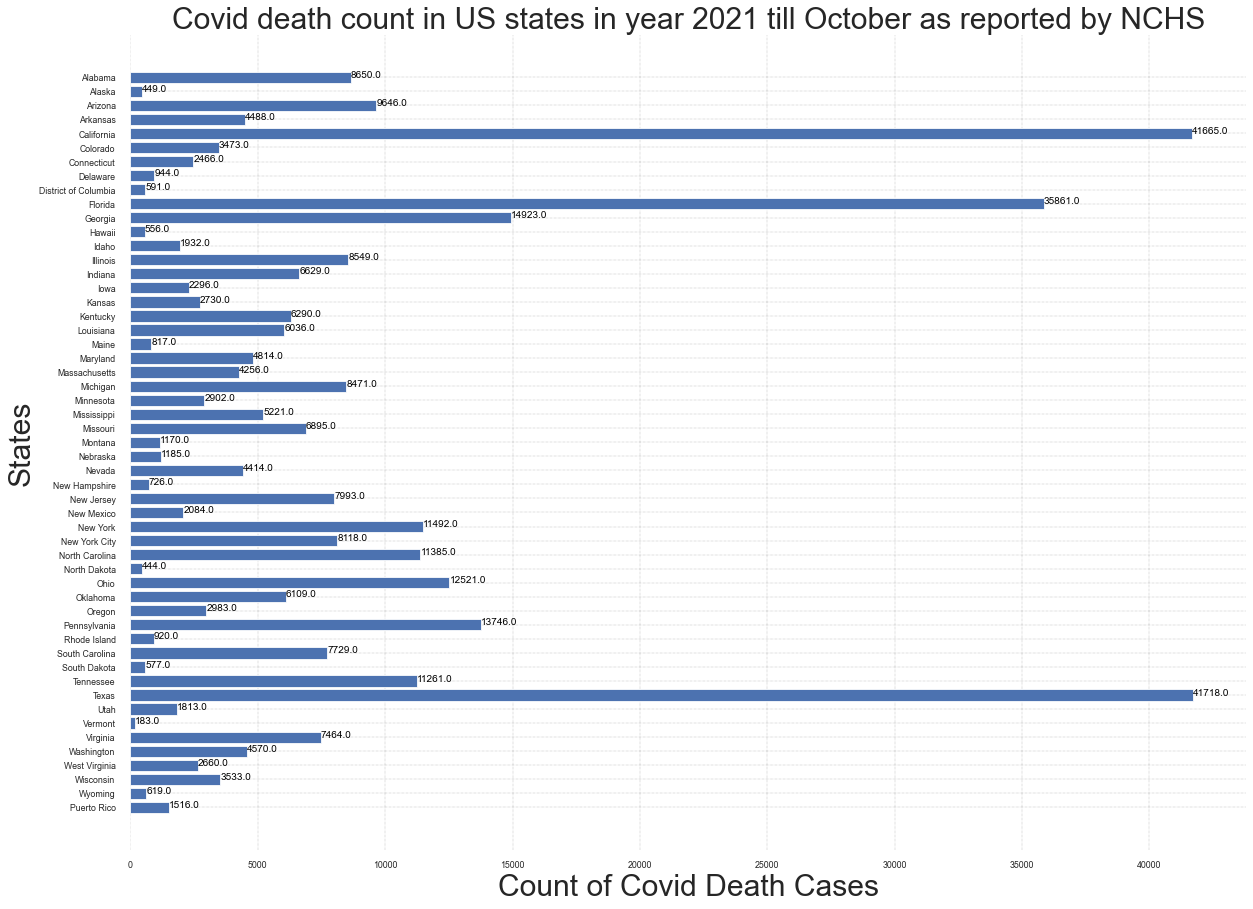

In [109]:
fig, ax = plt.subplots(figsize =(20, 15))
ax.barh(DF4['state'],DF4['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("States")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Covid death count in US states in year 2021 till October as reported by NCHS",
             loc='center' , fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
plt.show()


# illness condition contributing to deaths on age group

In [137]:
DF5 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.age_group !='All Ages')  & (covidDf.age_group !='Not stated') & (covidDf.illness_condition !='COVID-19')  & (covidDf.year != 2021)  ] 
DF6 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.age_group !='All Ages')  & (covidDf.age_group !='Not stated') & (covidDf.illness_condition !='COVID-19')  & (covidDf.year != 2020)  ] 


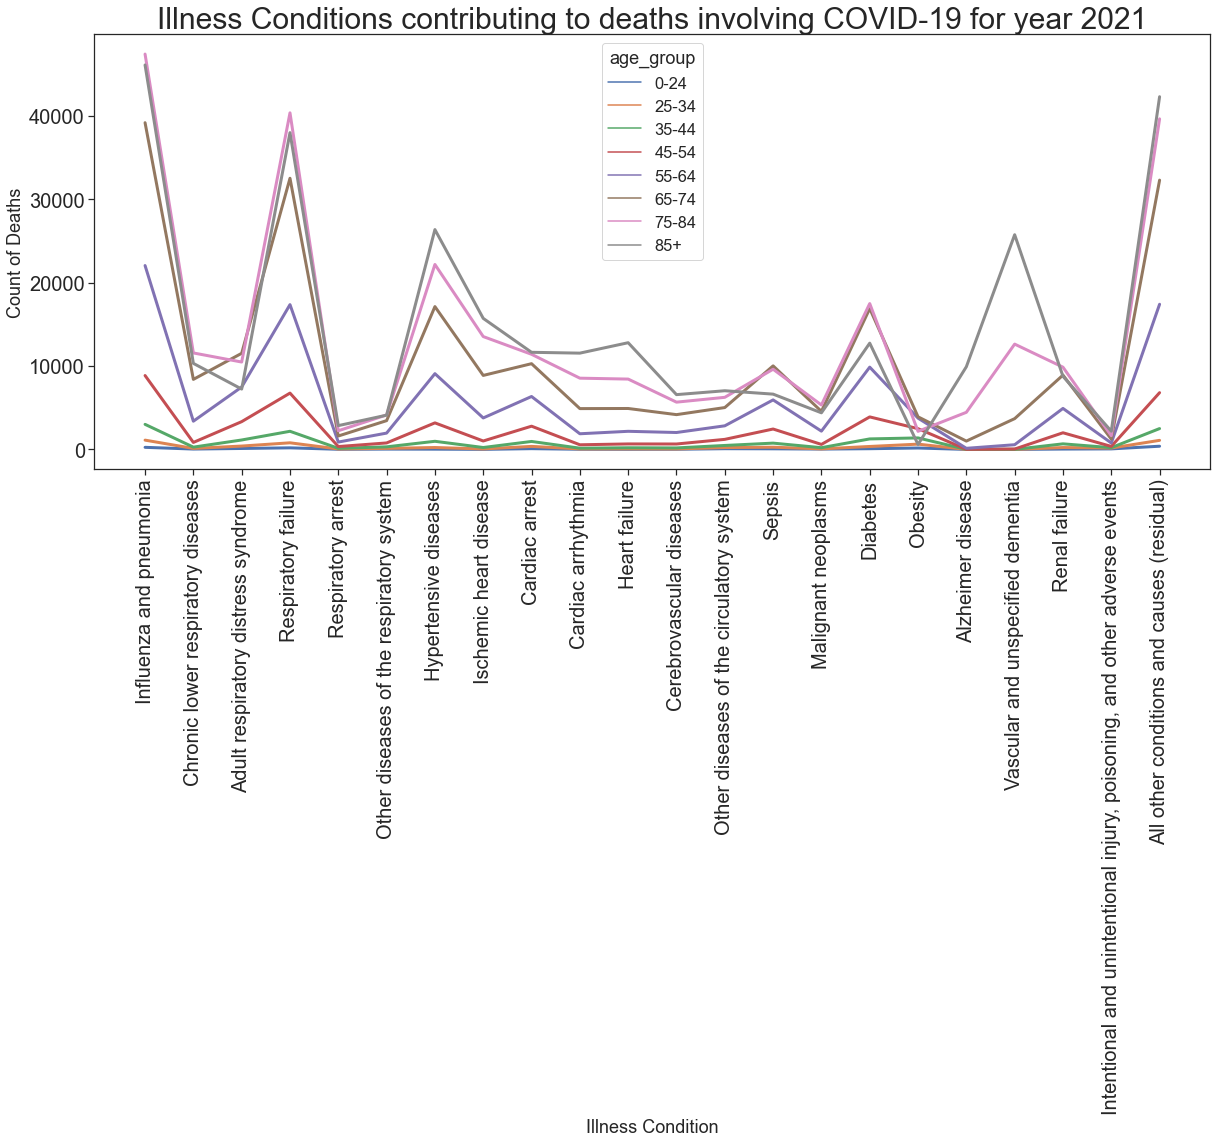

In [155]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
sns.lineplot(x="illness_condition", y="death_count", hue="age_group",
             data=DF5, linewidth = 3)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 

plt.title('Illness Conditions contributing to deaths involving COVID-19 for year 2021')
plt.ylabel("Count of Deaths")
plt.xlabel("Illness Condition")
plt.show()

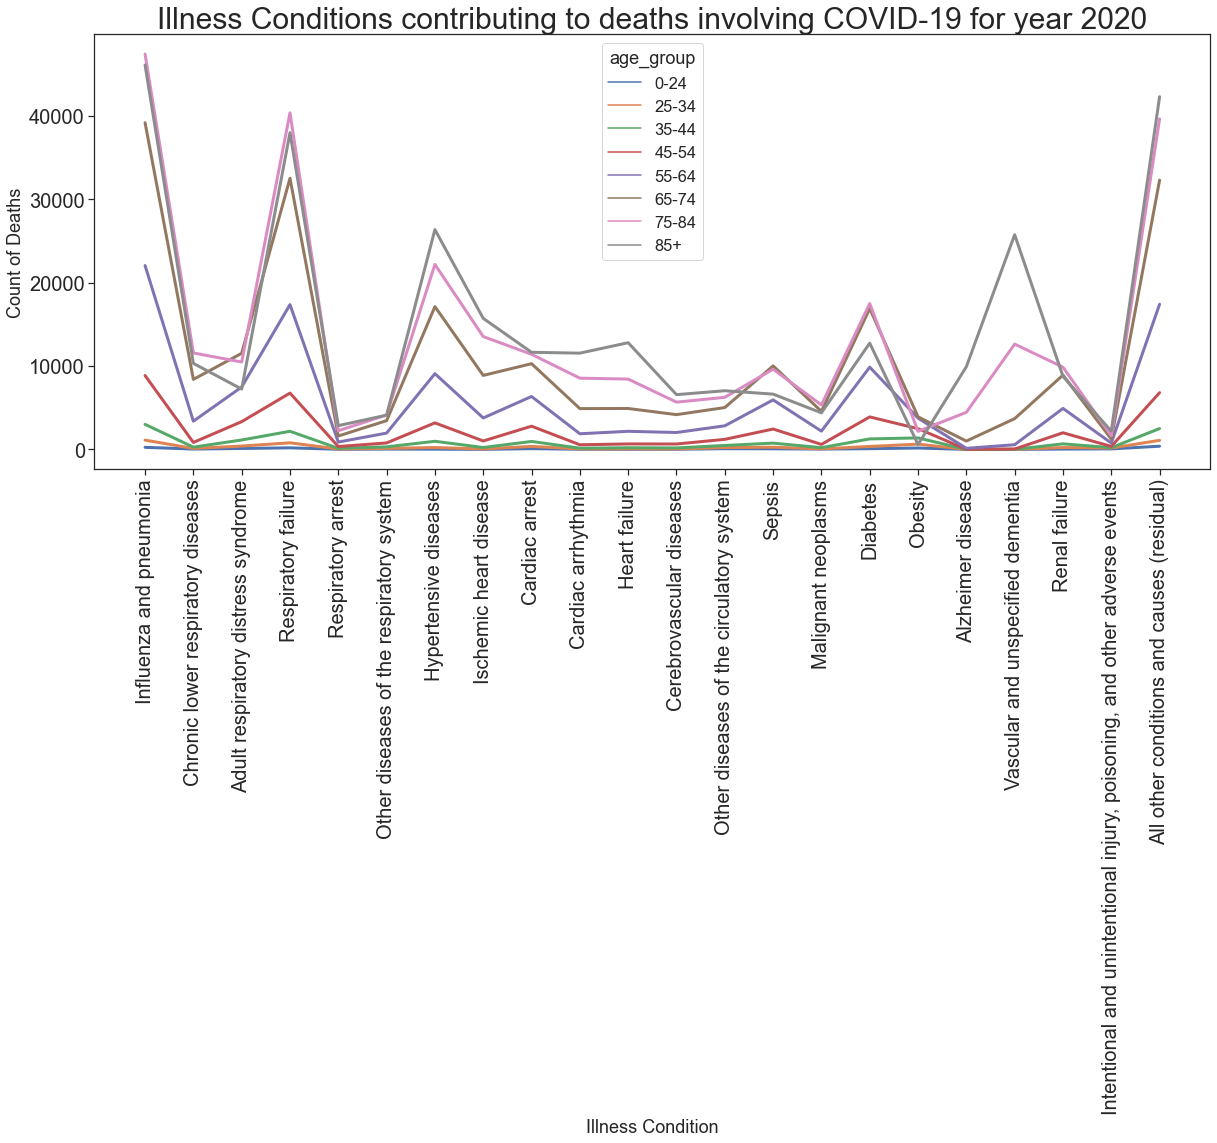

In [156]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

sns.lineplot(x="illness_condition", y="death_count", hue="age_group",
             data=DF5, linewidth = 3)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 

plt.title('Illness Conditions contributing to deaths involving COVID-19 for year 2020')
plt.ylabel("Count of Deaths")
plt.xlabel("Illness Condition")
plt.show()

# Covid-19 Death analysis by State and Age Group

In [140]:
DF7 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group !='All Ages')  & (covidDf.age_group !='Not stated') & (covidDf.illness_condition !='COVID-19')  & (covidDf.year != 2021)  ] 
DF8 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group !='All Ages')  & (covidDf.age_group !='Not stated') & (covidDf.illness_condition !='COVID-19')  & (covidDf.year != 2020)  ] 


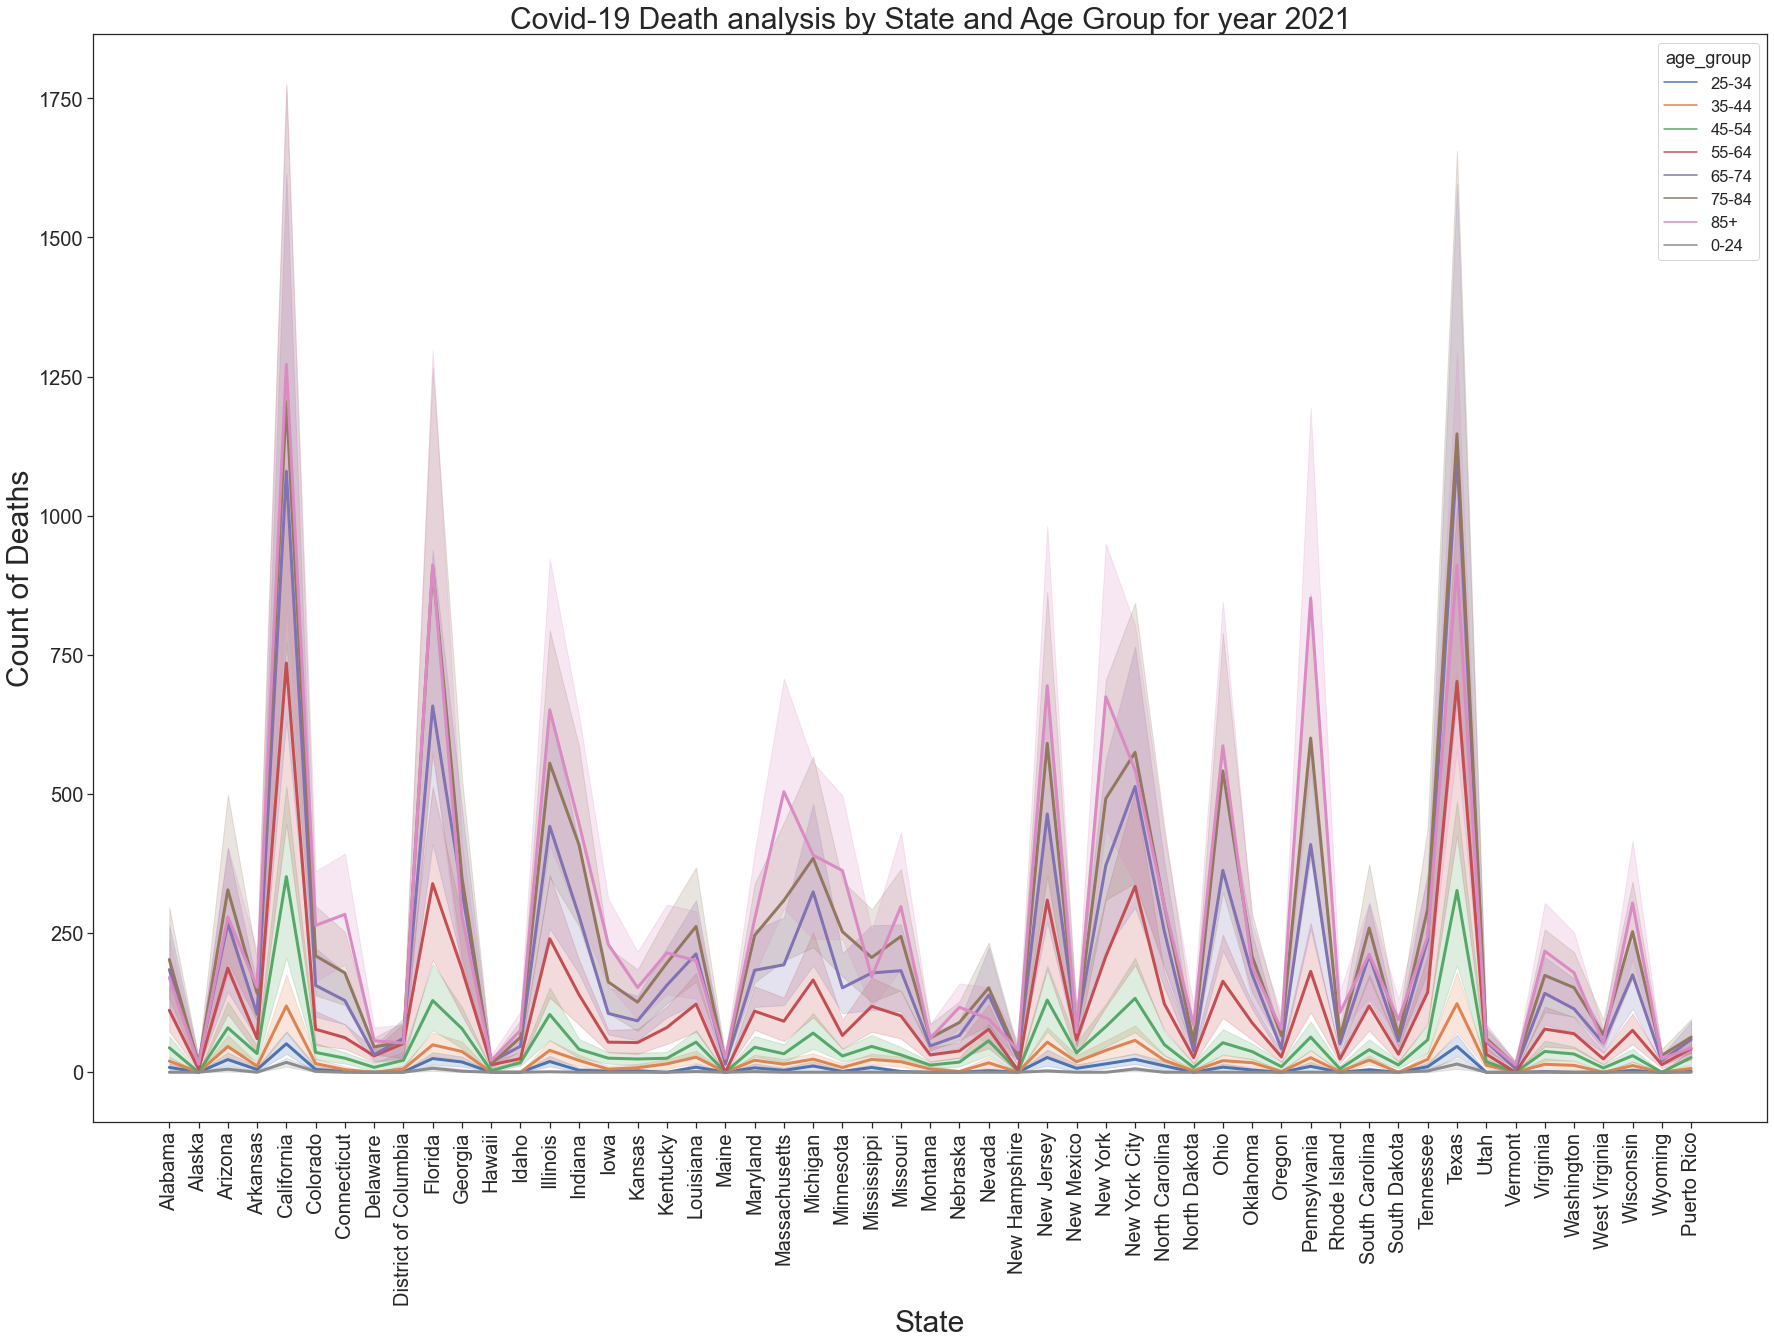

In [157]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

sns.lineplot(x="state", y="death_count", hue="age_group",
             data=DF7, linewidth = 3)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 

plt.title('Covid-19 Death analysis by State and Age Group for year 2021')
plt.ylabel("Count of Deaths")
plt.xlabel("State")
plt.show()

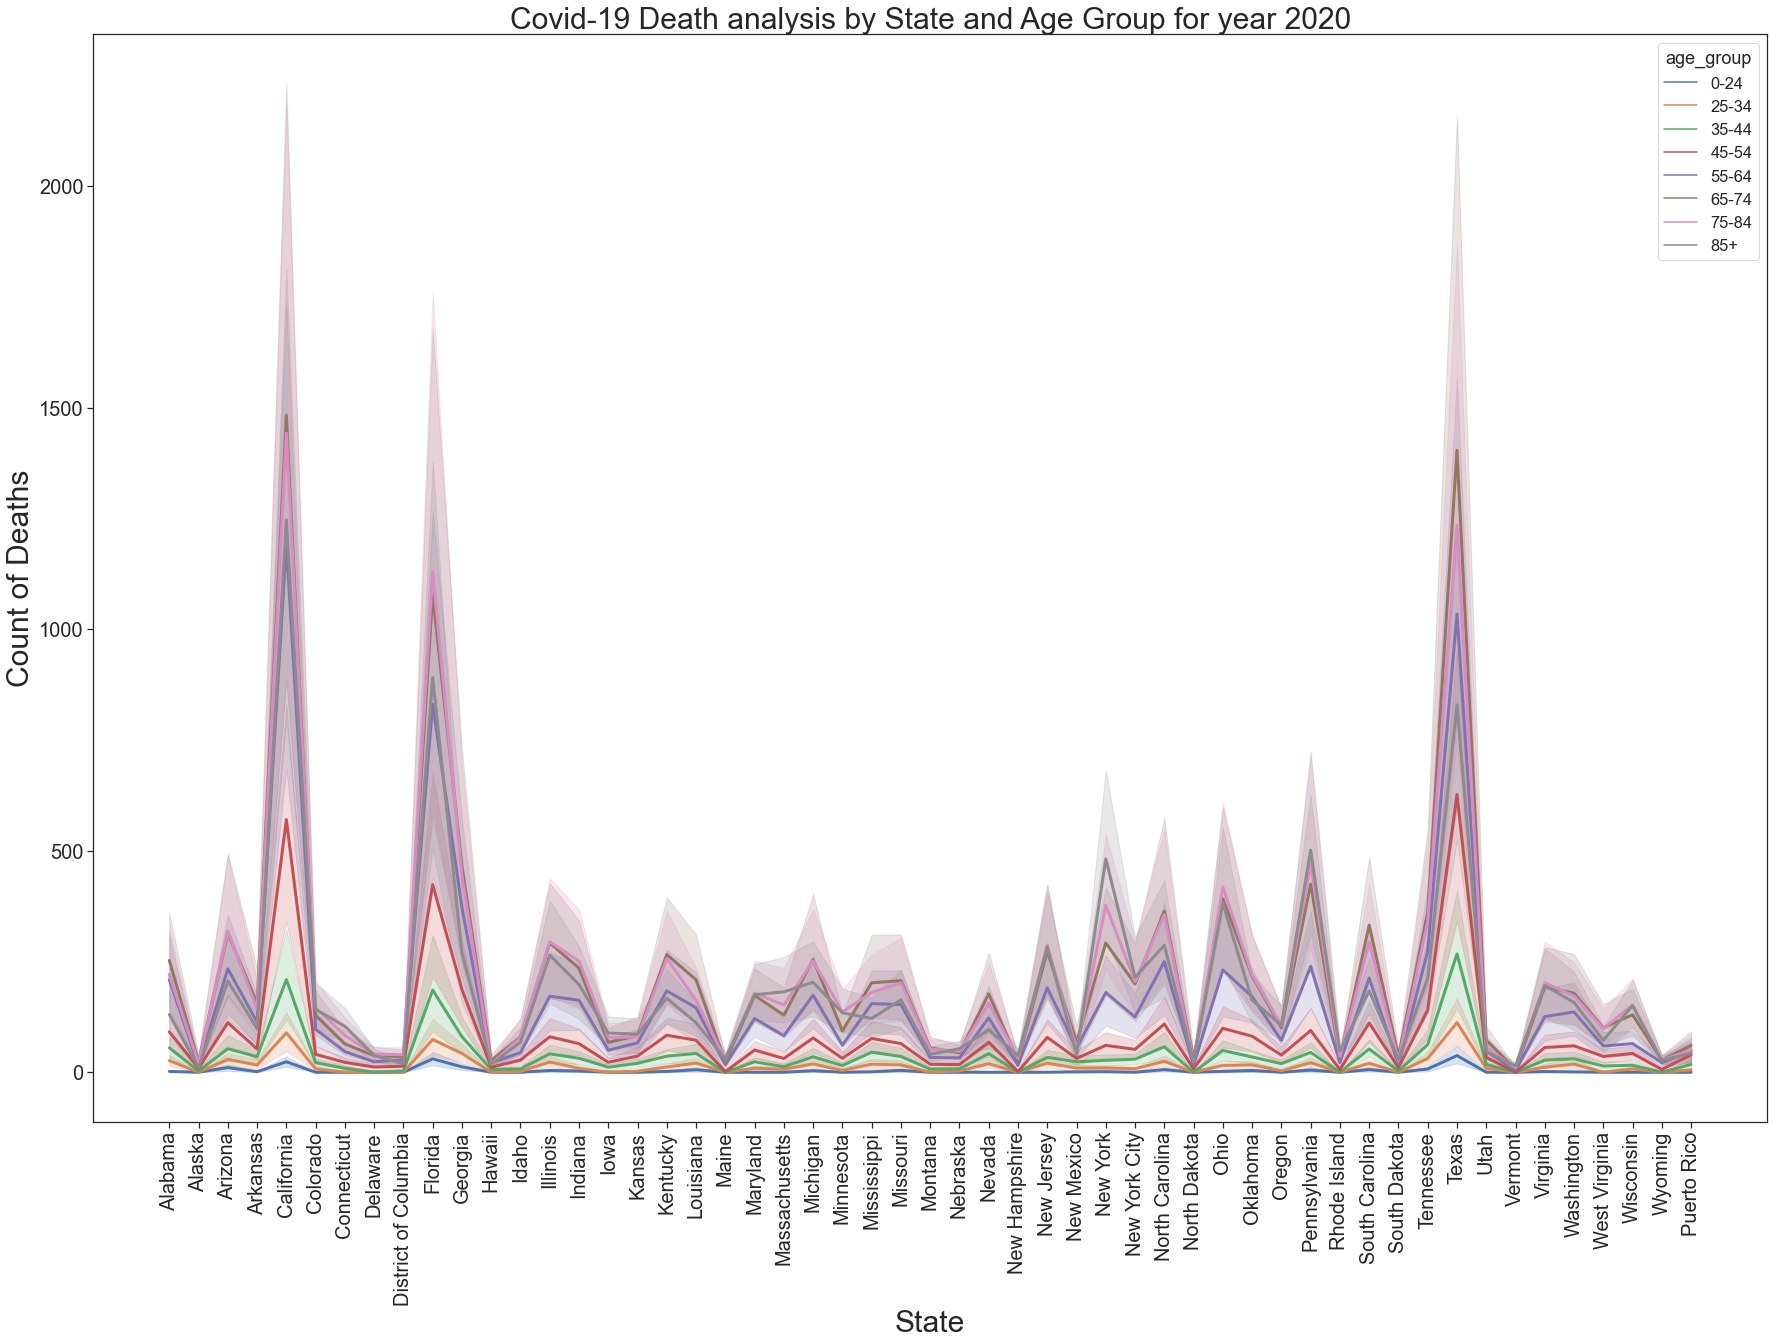

In [158]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

sns.lineplot(x="state", y="death_count", hue="age_group",
             data=DF8, linewidth = 3)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

plt.title('Covid-19 Death analysis by State and Age Group for year 2020')
plt.ylabel("Count of Deaths")
plt.xlabel("State")
plt.show()

In [161]:
# Covid-19 Death analysis by State and Age Group


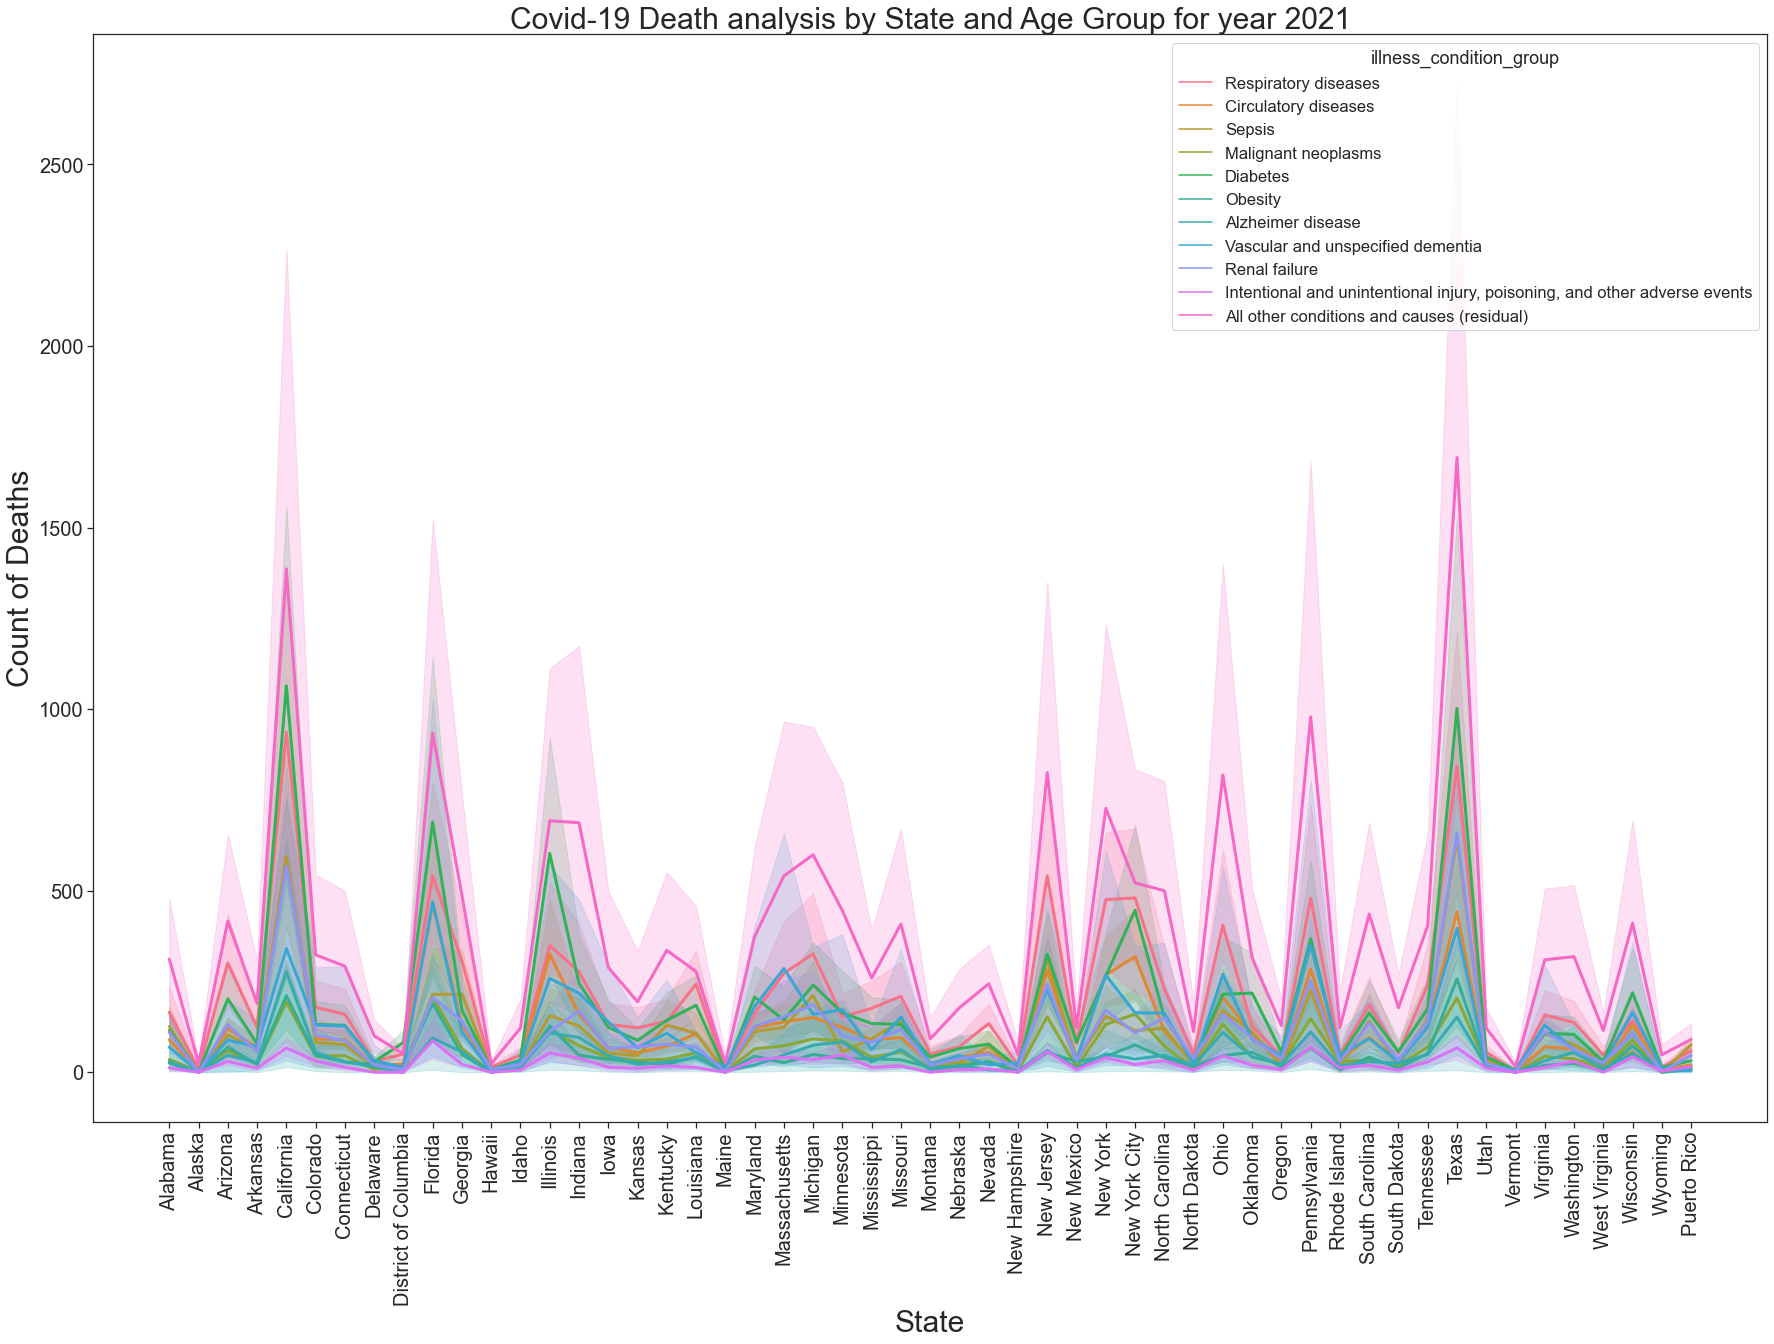

In [163]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

sns.lineplot(x="state", y="death_count", hue="illness_condition_group",
             data=DF7, linewidth = 3)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 

plt.title('Covid-19 Death analysis by State and Age Group for year 2021')
plt.ylabel("Count of Deaths")
plt.xlabel("State")
plt.show()

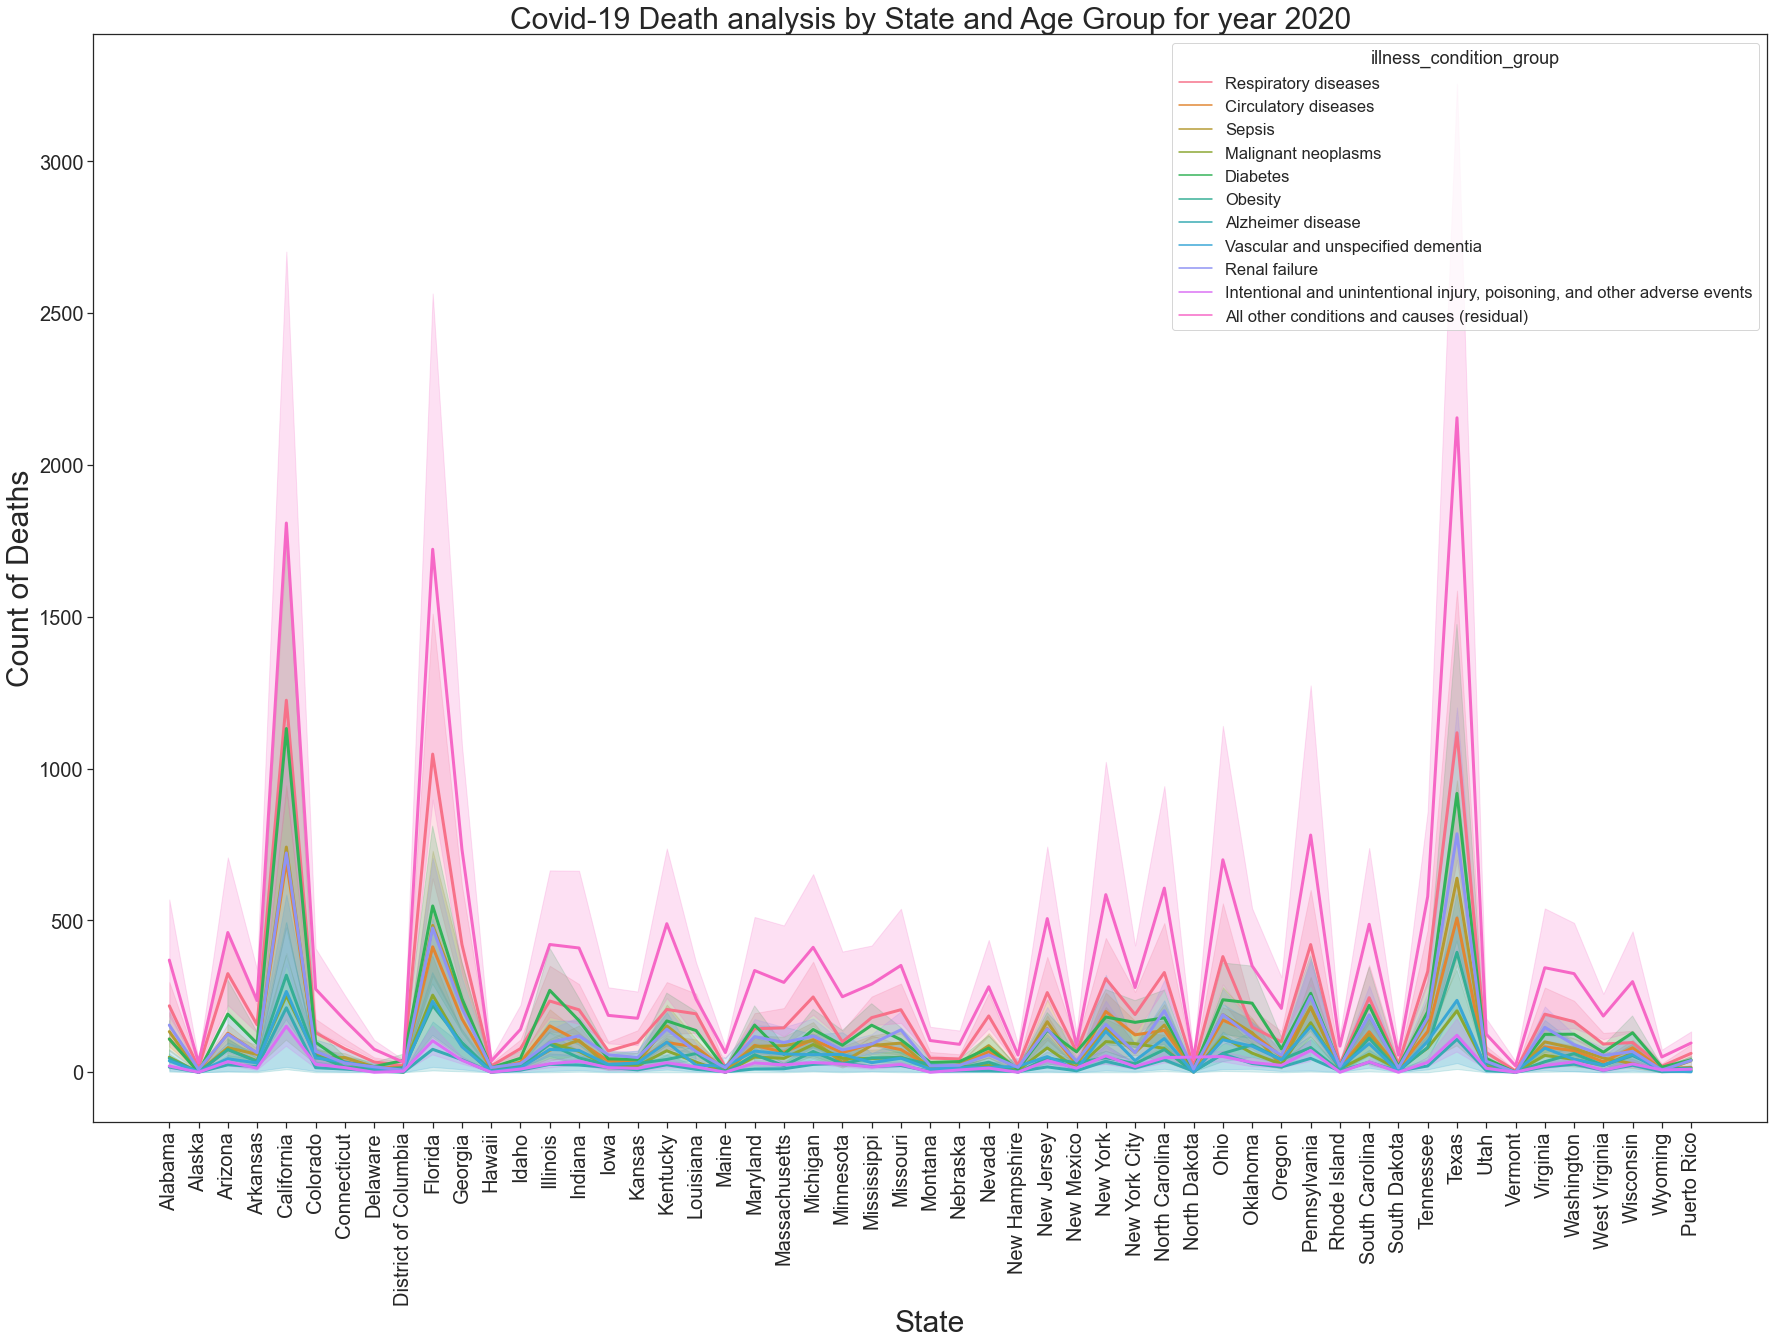

In [162]:
sns.set(font_scale=1.5) 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

sns.lineplot(x="state", y="death_count", hue="illness_condition_group",
             data=DF8, linewidth = 3)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30}) 
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

plt.title('Covid-19 Death analysis by State and Age Group for year 2020')
plt.ylabel("Count of Deaths")
plt.xlabel("State")
plt.show()